In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True

# Read the CSV file
df = pd.read_csv('figures/grouped_data_sudden_method.csv')

# Organize data
metrics = ["Coverage", "Avg. Width", "Avg. Miscoverage", "Avg. Regret"]
methods_abbr = ["SplitConformal", "NExConformal", "FACI", "ScaleFreeOGD", 
                "SimpleOGD", "FACI_S", "SAOCP", "MagnitudeLearner", 
                "MagLearnUndiscounted", "Modified Mag Learner"]
D = np.array([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])

# Creating dictionaries to hold data for each method
cov = {method: df['Cov'][df['Method'] == method] for method in methods_abbr[:-1]}
avg_width = {method: df['AvgWidth'][df['Method'] == method] for method in methods_abbr[:-1]}
avg_regret = {method: df['AvgRegret'][df['Method'] == method] for method in methods_abbr[:-1]}
avg_miscov = {method: df['AvgMiscov'][df['Method'] == method] for method in methods_abbr[:-1]}

# Handling the last method separately as it seems to be hardcoded in the original code
cov[methods_abbr[-1]] = 0.898 * np.ones(len(D))
avg_width[methods_abbr[-1]] = 145 * np.ones(len(D))

# Indices to plot
idx_toplot = [methods_abbr.index(m) for m in ["SimpleOGD","ScaleFreeOGD", "SAOCP", "MagnitudeLearner", "MagLearnUndiscounted"]]

# Learning methods names for legend
learning_methods = ["Split Conformal", "NExConformal", "FACI", "SF-OGD", 
                    "Simple OGD", "FACI-S", "SAOCP", "Mag. Learner", 
                    "Undiscounted Mag. Learner", "Mag. Learner ($h_t = 0$)"]

# This sets up the data for plotting. Next, we'll handle the plotting part.

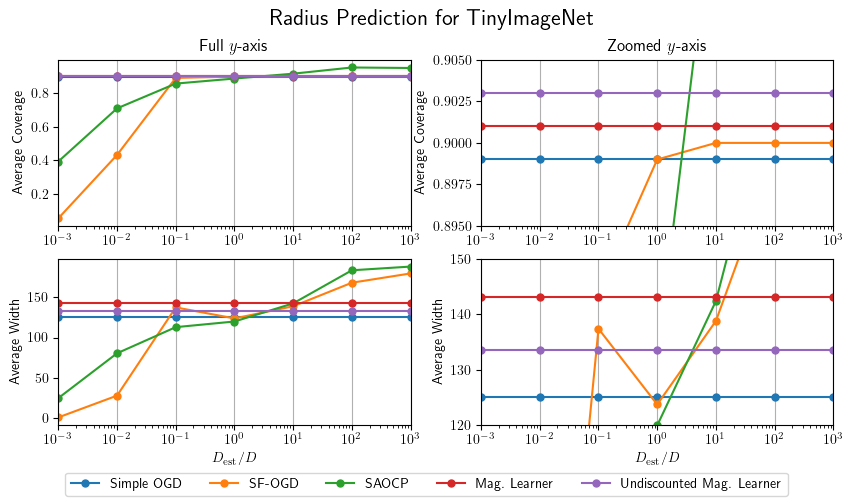

In [8]:
# Setting up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Plotting settings
marker_size = 5
line_style = 'o-'

# Subplot 1: Average Coverage, full data
for i in idx_toplot:
    method = methods_abbr[i]
    axs[0, 0].semilogx(D, cov[method], line_style, markersize=marker_size, label=learning_methods[i])
# axs[0, 0].set_ylabel("Average\nCoverage")
axs[0, 0].set_ylabel("Average Coverage")
axs[0, 0].xaxis.grid(True)
axs[0, 0].set_xticks(D)
axs[0, 0].set_xlim([1e-3, 1e3])
axs[0, 0].set_title("Full $y$-axis")

# Subplot 2: Average Width, full data
for i in idx_toplot:
    method = methods_abbr[i]
    axs[1, 0].semilogx(D, avg_width[method], line_style, markersize=marker_size)
# axs[1, 0].set_ylabel("Average\nWidth")
axs[1, 0].set_ylabel("Average Width")
axs[1, 0].xaxis.grid(True)
axs[1, 0].set_xticks(D)
axs[1, 0].set_xlim([1e-3, 1e3])
axs[1, 0].set_xlabel('$D_{\mathrm{est}} / D$')

# Subplot 3: Average Coverage, zoomed y-axis
for i in idx_toplot:
    method = methods_abbr[i]
    axs[0, 1].semilogx(D, cov[method], line_style, markersize=marker_size)
axs[0, 1].set_xticks(D)
axs[0, 1].xaxis.grid(True)
axs[0, 1].set_xlim([1e-3, 1e3])
axs[0, 1].set_ylim([0.895, 0.905])
# axs[0, 1].set_ylabel("Average\nCoverage")
axs[0, 1].set_ylabel("Average Coverage")
axs[0, 1].set_title("Zoomed $y$-axis")

# Subplot 4: Average Width, zoomed y-axis
for i in idx_toplot:
    method = methods_abbr[i]
    axs[1, 1].semilogx(D, avg_width[method], line_style, markersize=marker_size)
axs[1, 1].set_xticks(D)
axs[1, 1].xaxis.grid(True)
axs[1, 1].set_xlim([1e-3, 1e3])
axs[1, 1].set_ylim([120, 150])
# axs[1, 1].set_ylabel("Average\nWidth")
axs[1, 1].set_ylabel("Average Width")
axs[1, 1].set_xlabel('$D_{\mathrm{est}} / D$')

# Additional settings for the overall figure
fig.suptitle("Radius Prediction for TinyImageNet", fontsize=16)
plt.subplots_adjust(bottom=0.15)

# Correcting the legend indexing issue
learning_methods_to_plot = [learning_methods[i] for i in idx_toplot]

# Redoing the legend part
fig.legend(learning_methods_to_plot, loc='lower center', ncol=6)

# Show the plot
plt.show()
import os
__file__ = "comparisonfigure.ipynb"
figdir = os.path.join(os.path.dirname(os.path.abspath(__file__)), "figures")
os.makedirs(figdir, exist_ok=True)
fig.savefig(os.path.join(figdir, "TinyImageNet_RadiusPrediction.pdf"))